Step 1: Import the necessary libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import os
tf.__version__
keras.__version__

'3.10.0'

Step 2: Import a toy dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
# Import the Fashion MNIST dataset into training and testing sets
# Split the dataset into training and testing sets
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

Step 3: Normalize and scale the toy dataset

In [3]:
# split the training set into a validation set and a training set
X_valid, X_train = X_train_full[:5000]/255., X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

# Set the class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]



Example Image

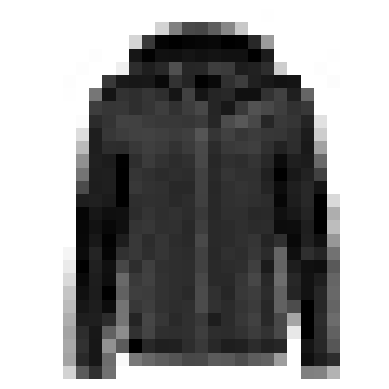

In [4]:
class_names[y_train[0]]
plt.imshow(X_train[0],cmap="binary")
plt.axis('off')
plt.show()

In [5]:
# Investigate the size of the images in the dataset
sample_image_size=X_train[0].shape
print(f"Sample size: {sample_image_size}")
# SHpe of the train set
print(f"Train set shape: {X_train.shape}")
print(f"Validation set shape: {X_valid.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"y train shape: {y_train.shape}")
print(f"y train sample: {y_train[0]}")

Sample size: (28, 28)
Train set shape: (55000, 28, 28)
Validation set shape: (5000, 28, 28)
Test set shape: (10000, 28, 28)
y train shape: (55000,)
y train sample: 4


Created a script to keep track of model validation accuracy and loss

In [6]:
# Create script to keep track of Model performance
log_file = "model_validation_log.csv"

# Create log file if it doesn't exist
if not os.path.exists(log_file):
    df = pd.DataFrame(columns=["Model_Name", "Timestamp", "Val_Loss", "Val_Accuracy"])
    df.to_csv(log_file, index=False)
    
def log_model_validation(model_name, val_loss, val_accuracy):
    df = pd.read_csv(log_file)
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    new_row = {
        "Model_Name": model_name,
        "Timestamp": timestamp,
        "Val_Loss": round(val_loss, 4),
        "Val_Accuracy": round(val_accuracy, 4)
    }
    df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
    df.to_csv(log_file, index=False)
    print(f"✅ Logged: {model_name} — Val Acc: {val_accuracy:.4f}, Val Loss: {val_loss:.4f}")


Step 4: Describe the shape of the NN

### Naming Convention for models established to keep track of changes:

D3_ReLU_Adam_LR0.001_HN_DR0.3

Would mean:

- 3 Dense layers

- ReLU activation

- Adam optimizer with learning rate 0.001

- He Normal initializer

- Dropout rate of 0.3



| Abbreviation          | Description                                                               |
| --------------------- | ------------------------------------------------------------------------- |
| `D1`, `D2`, `D3`, ... | Number of **Dense** layers (e.g., `D3` = 3 Dense layers)                  |
| `ReLU`                | **ReLU** activation used in hidden layers                                 |
| `Sigmoid`             | **Sigmoid** activation used in hidden layers                              |
| `Tanh`                | **Tanh** activation used in hidden layers                                 |
| `Softmax`             | **Softmax** activation in output layer (implied for classification tasks) |
| `SGD`                 | **Stochastic Gradient Descent** optimizer                                 |
| `Adam`                | **Adam** optimizer                                                        |
| `RMSprop`             | **RMSprop** optimizer                                                     |
| `LRx.xx`              | Learning Rate used in the optimizer (e.g., `LR0.001`)                     |
| `DRx`                 | **Dropout Rate** used (e.g., `DR0.3` = dropout of 30%)                    |
| `HN`                  | **He Normal** weight initialization (good with ReLU)                      |
| `XG`                  | **Xavier Glorot** initialization (default in Keras for Dense layers)      |
| `BN`                  | **Batch Normalization** layer used                                        |
| `TS`                  | **Tanh-Sigmoid** hybrid activation setup                                  |
| `TSx`                 | Number of **training steps/epochs** (optional, e.g., `TS30`)              |


In [7]:
model_name = "D3_ReLU_SGD_LR0.01_XG"


model0 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers .Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

/opt/anaconda3/envs/appliedmlclass/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Print and describe model shape of the NN

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

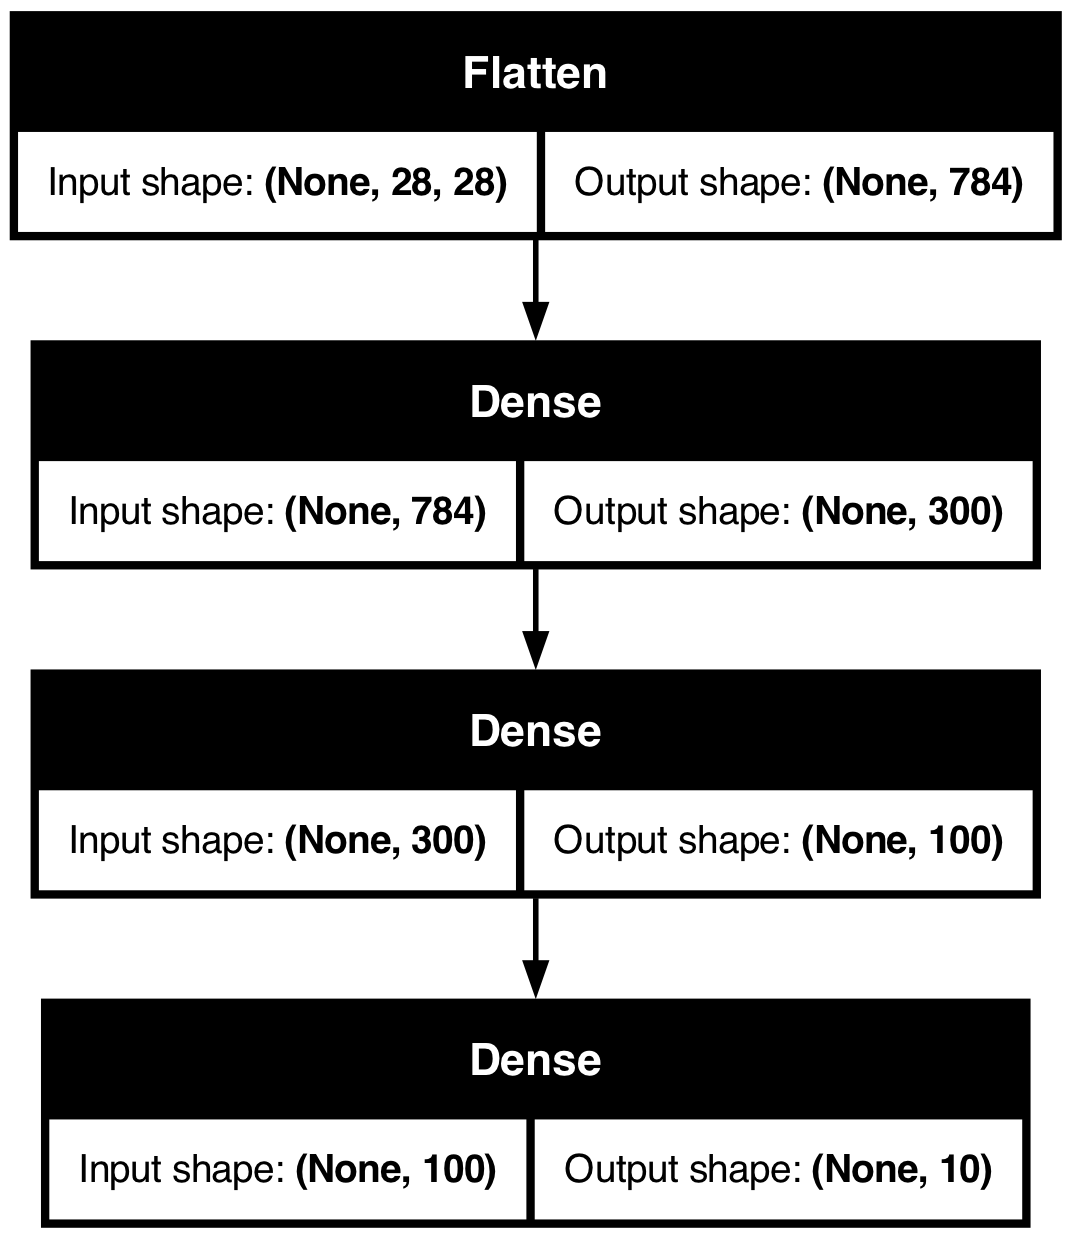

In [8]:
model0.summary()
keras.utils.plot_model(model0, "erins_fashion_mnist_model.png", show_shapes=True)

More example images

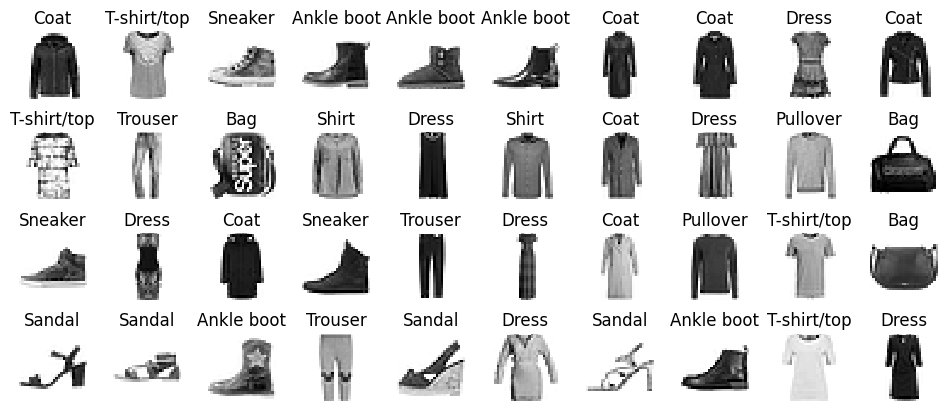

In [9]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = row * n_cols + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Step 5: Tell it which optimizer, the loss to minimize, and the metrics to measure

In [10]:
model0.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Step 6: Fit the model, keeping track of validation loss

In [11]:
history = model0.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))


Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6945 - loss: 0.9769 - val_accuracy: 0.8200 - val_loss: 0.5157
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8256 - loss: 0.4964 - val_accuracy: 0.8332 - val_loss: 0.4656
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8417 - loss: 0.4484 - val_accuracy: 0.8504 - val_loss: 0.4323
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 979us/step - accuracy: 0.8534 - loss: 0.4153 - val_accuracy: 0.8608 - val_loss: 0.4029
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8610 - loss: 0.3936 - val_accuracy: 0.8542 - val_loss: 0.4066
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1000us/step - accuracy: 0.8654 - loss: 0.3807 - val_accuracy: 0.8728 - val_loss: 0.3746
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 987us/step - accuracy: 0.8725 - loss: 0.3665 - val_accuracy: 0.8710 - val_loss: 0.3658
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8733 - loss: 0.

In [12]:
# Get final validation loss and accuracy
val_loss = history.history["val_loss"][-1]
val_accuracy = history.history["val_accuracy"][-1]

# Log the results
log_model_validation(model_name, val_loss, val_accuracy)

✅ Logged: D3_ReLU_SGD_LR0.01_XG — Val Acc: 0.8918, Val Loss: 0.3109


/var/folders/8l/84kclwfs5d1gv3_4t02t8lhd2d0k9k/T/ipykernel_68220/3915365335.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)


Step 7: Plot learning curves

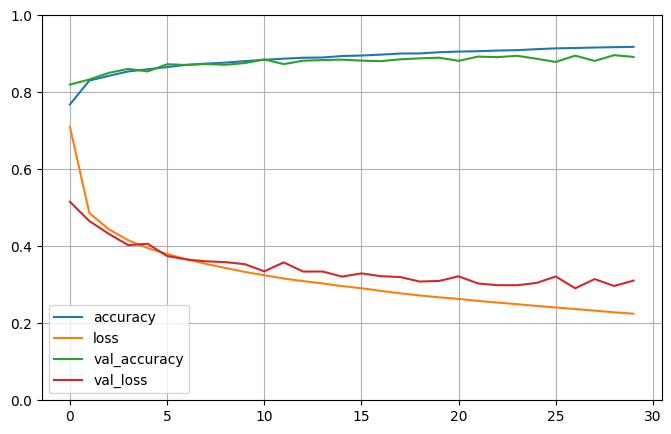

In [13]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.savefig("keras_learning_curves_plot")
plt.show()

Step 8: Evaluate the trained model on testing data(Delayed this step until )

Apply the following changes to the model and record the model with the highest accuracy. Explain the changes you made and why you think they improved the model.
- change layers
- change optimization
- change initialization
- change nonlinear function
- add regularization

For each model, the following naming convention should be used:


## First Change: Change layers

Here I have decided to change the number of layers in my model by adding another hidden layer with 64 neurons and changing the number of neurons in the second hidden layer to 128. In general, adding more layers and neurons can help the model learn more complex patterns in the data, which may lead to better performance. However it is important to monitor the model's performance on the validation set to avoid overfitting.

In [14]:
model_name1 = "D4_ReLU_SGD_LR0.01_XG"
# Describe the shape of the sequential NN with change to number of layers
model1 = keras.models.Sequential([
    # Made Input(shape) object as first layer to match Keras best practices
    keras.Input(shape=[28, 28]),
    keras.layers.Flatten(),
    keras.layers .Dense(300, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 282,934 (1.08 MB)

 Trainable params: 282,934 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

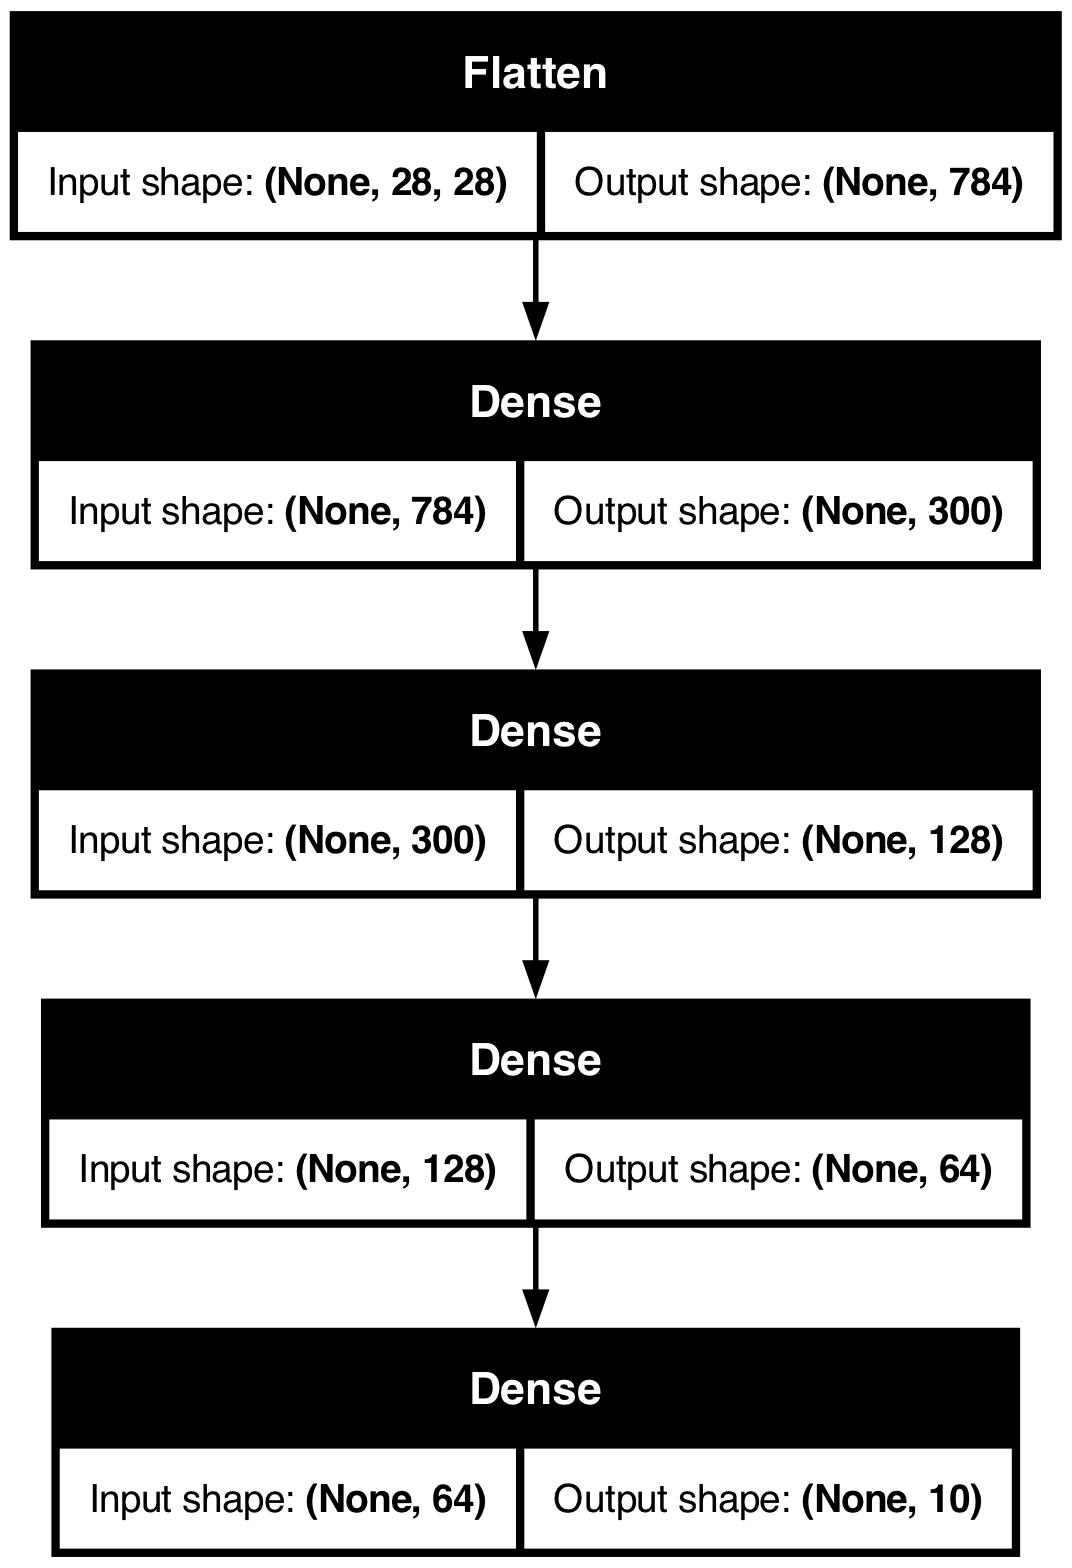

In [15]:
model1.summary()
keras.utils.plot_model(model1, "erins_fashion_mnist_model1.png", show_shapes=True)

Kept same optimizer, loss, and metrics as before.

In [16]:
model1.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [17]:
history1 = model1.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6803 - loss: 1.0090 - val_accuracy: 0.8170 - val_loss: 0.5176
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8275 - loss: 0.4942 - val_accuracy: 0.8424 - val_loss: 0.4467
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8450 - loss: 0.4414 - val_accuracy: 0.8612 - val_loss: 0.3988
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8571 - loss: 0.4053 - val_accuracy: 0.8644 - val_loss: 0.3884
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8644 - loss: 0.3805 - val_accuracy: 0.8700 - val_loss: 0.3630
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8702 - loss: 0.3674 - val_accuracy: 0.8678 - val_loss: 0.3584
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8727 - loss: 0.3565 - val_accuracy: 0.8726 - val_loss: 0.3540
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8799 - loss: 0.3326 - 

In [18]:
# Get final validation loss and accuracy
val_loss = history1.history["val_loss"][-1]
val_accuracy = history1.history["val_accuracy"][-1]

# Log the results
log_model_validation(model_name1, val_loss, val_accuracy)

✅ Logged: D4_ReLU_SGD_LR0.01_XG — Val Acc: 0.8938, Val Loss: 0.2908


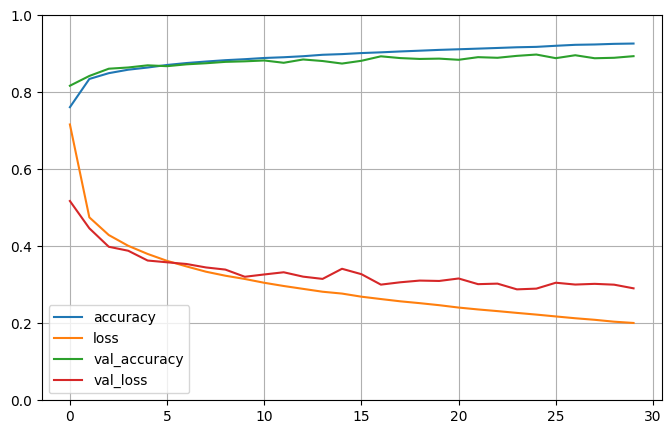

In [19]:
pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.savefig("keras_learning_curves_plot1")
plt.show()

Slight increase in validation accuracy and decrease in validation loss compared to the original model, indicating that the changes made only slightly improves the model's performance.

## Change 2: Change Optimizer

Here i decided to change the optimizer from SGD to Adam. 

Adam(Adaptive movement estimation), in general:
- Faster convergence compared to SGD
- May overfit

In [20]:
model_name2 = "D3_ReLU_Adam_LR0.001_XG"

# Describe the shape of the sequential NN with change to optimizer, now using Adam
model2 = keras.models.Sequential([
    # Made Input(shape) object as first layer to match Keras best practices
    keras.Input(shape=[28, 28]),
    keras.layers.Flatten(),
    keras.layers .Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

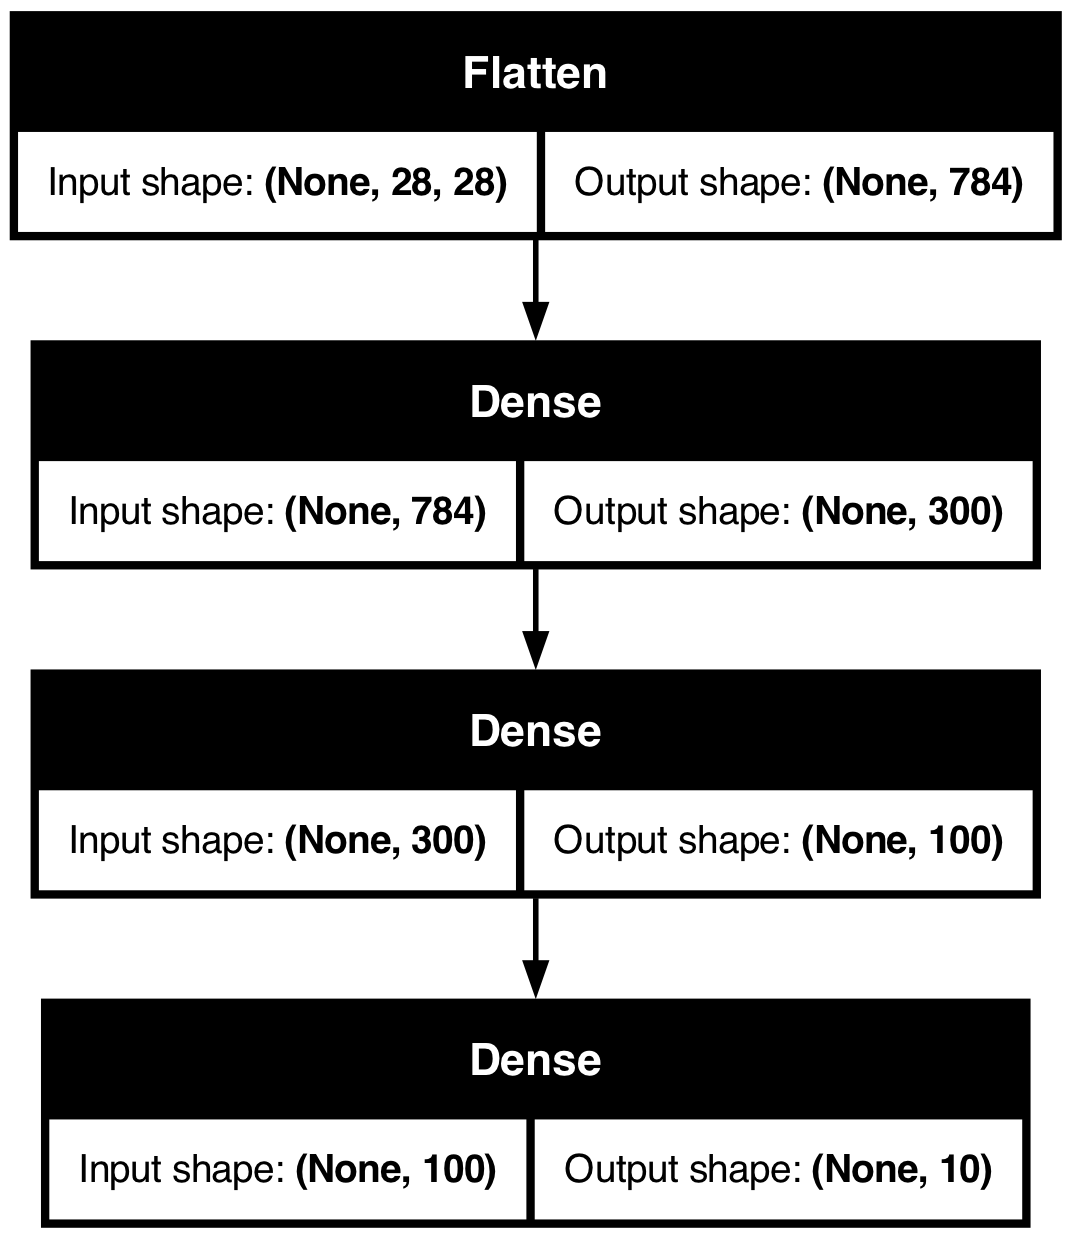

In [21]:
model2.summary()
keras.utils.plot_model(model2, "erins_fashion_mnist_model2.png", show_shapes=True)

In [22]:
# Describe the shape of the sequential NN with change to optimizer, now using Adam
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [23]:
# Fit the model with the new optimizer
history2 = model2.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 95s 55ms/step - accuracy: 0.7860 - loss: 0.6029 - val_accuracy: 0.8510 - val_loss: 0.4054
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8658 - loss: 0.3696 - val_accuracy: 0.8732 - val_loss: 0.3593
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8775 - loss: 0.3320 - val_accuracy: 0.8814 - val_loss: 0.3279
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8869 - loss: 0.3028 - val_accuracy: 0.8844 - val_loss: 0.3238
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8918 - loss: 0.2865 - val_accuracy: 0.8890 - val_loss: 0.3063
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8985 - loss: 0.2698 - val_accuracy: 0.8792 - val_loss: 0.3204
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9055 - loss: 0.2515 - val_accuracy: 0.8914 - val_loss: 0.2986
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9071 - loss: 0.2451 

In [24]:
# Get final validation loss and accuracy
val_loss = history2.history["val_loss"][-1]
val_accuracy = history2.history["val_accuracy"][-1]

# Log the results
log_model_validation(model_name2, val_loss, val_accuracy)

✅ Logged: D3_ReLU_Adam_LR0.001_XG — Val Acc: 0.8954, Val Loss: 0.4092


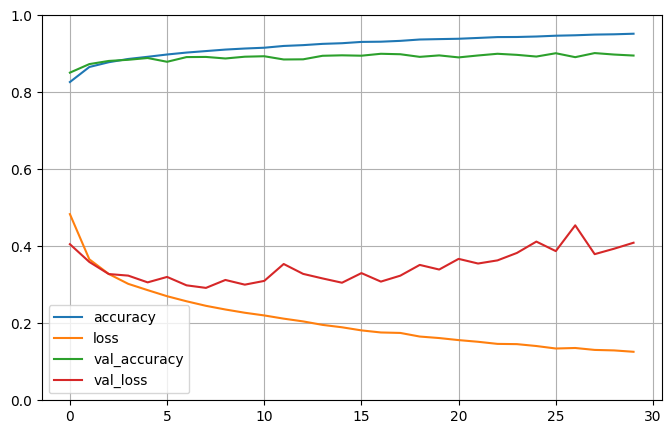

In [25]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.savefig("keras_learning_curves_plot2")
plt.show()

The large gap between training and validation accuracy suggests that the model may be overfitting to the training data. For next change add regularization using dropout layers to help reduce overfitting.

## Change 3: Change Optimizer + Add Regularization

Previously the optimizer was changed from SGD to Adam to improve accuracy however, the model was overfitting to the training data. Now, I have :

- Added dropout layers to the model to help reduce overfitting. Dropout rate = 0.2 (20% of the neurons in the dropout layer will be randomly set to zero during training). This helps prevent overfitting by reducing the reliance on specific neurons and encouraging the model to learn more robust features.
- Kept the Adam optimizer with a learning rate of 0.001.
- Started with a dropout rate of 0.3 but reduced it to 0.2 because of large drop in accuracy

In [26]:
model_name3 = "D3_ReLU_Adam_LR0.001_XG_DR0.2"

# Describe the shape of the sequential NN with change to optimizer, now using Adam
model3 = keras.models.Sequential([
    # Made Input(shape) object as first layer to match Keras best practices
    keras.Input(shape=[28, 28]),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.2),  # Add dropout layer with 20% dropout rate
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dropout(0.2),  # Add dropout layer with 20% dropout rate
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.2),  # Add dropout layer with 20% dropout rate
    keras.layers.Dense(10, activation="softmax")
])

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

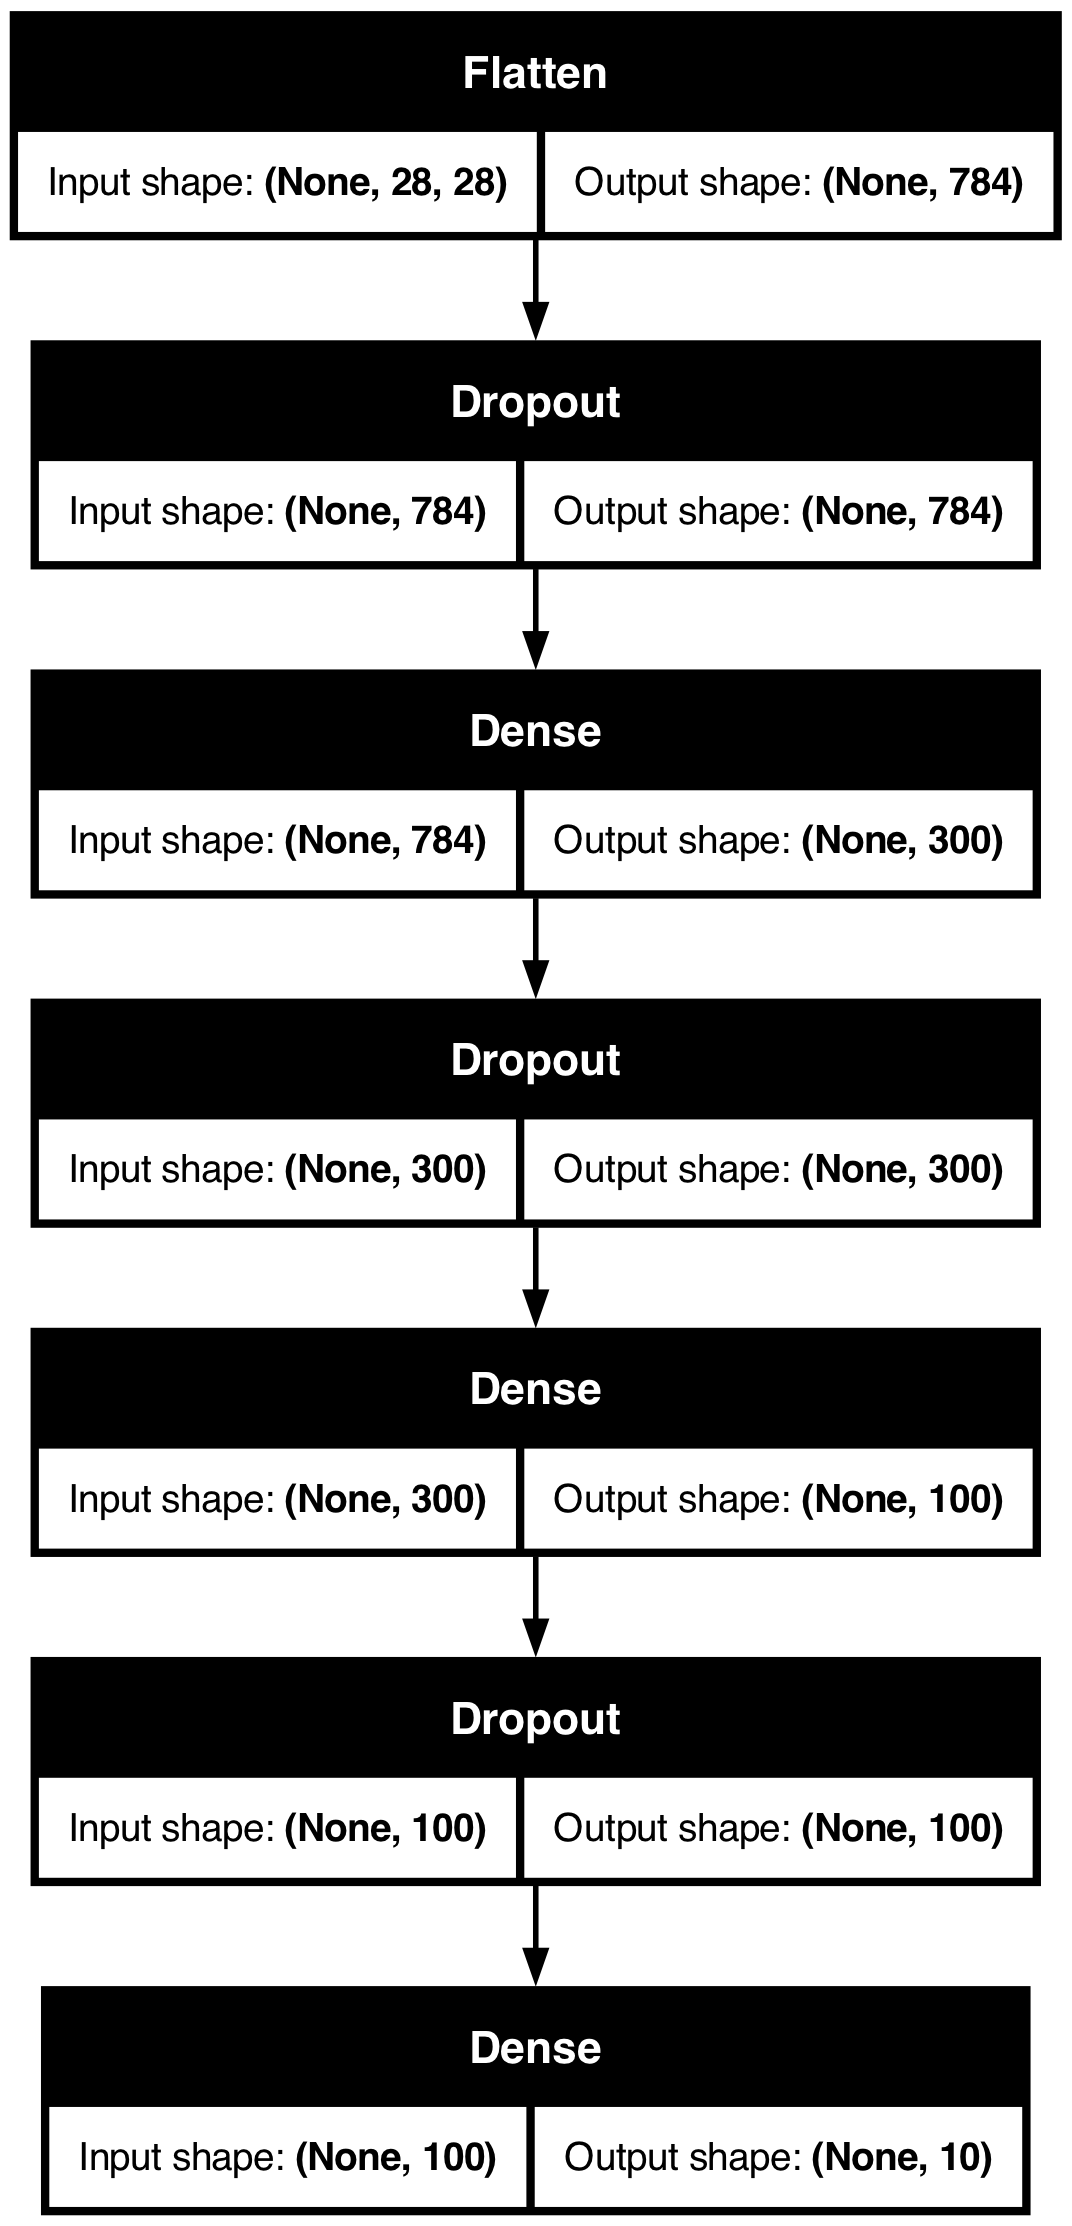

In [27]:
model3.summary()
keras.utils.plot_model(model3, "erins_fashion_mnist_model3.png", show_shapes=True)

In [28]:
# Describe the shape of the sequential NN with change to optimizer, now using Adam
model3.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [29]:
# Fit the model with the new optimizer
history3 = model3.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7286 - loss: 0.7579 - val_accuracy: 0.8552 - val_loss: 0.4025
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8326 - loss: 0.4566 - val_accuracy: 0.8680 - val_loss: 0.3628
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8498 - loss: 0.4096 - val_accuracy: 0.8708 - val_loss: 0.3536
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8557 - loss: 0.3907 - val_accuracy: 0.8728 - val_loss: 0.3421
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8613 - loss: 0.3755 - val_accuracy: 0.8802 - val_loss: 0.3154
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8630 - loss: 0.3681 - val_accuracy: 0.8858 - val_loss: 0.3178
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8655 - loss: 0.3600 - val_accuracy: 0.8810 - val_loss: 0.3170
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8708 - loss: 0.3490 - 

In [30]:
# Get final validation loss and accuracy
val_loss = history3.history["val_loss"][-1]
val_accuracy = history3.history["val_accuracy"][-1]

# Log the results
log_model_validation(model_name3, val_loss, val_accuracy)

✅ Logged: D3_ReLU_Adam_LR0.001_XG_DR0.2 — Val Acc: 0.9002, Val Loss: 0.2947


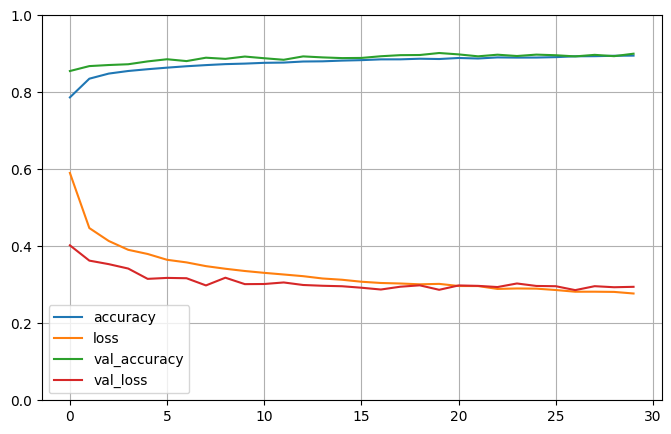

In [31]:
pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.savefig("keras_learning_curves_plot3")
plt.show()

## Change 4: Change Optimizer + Add Regularization + Train Longer(50 epochs)

Previously the model was trained for 30 epochs. To further improve performance, I will train the model for 50 epochs while monitoring the validation loss and accuracy. Also include EarlyStopping to prevent overfitting.


In [32]:
model_name4 = "D3_ReLU_Adam_LR0.001_XG_DR0.2_EP50"

# Describe the shape of the sequential NN with change to optimizer, now using Adam
model4 = keras.models.Sequential([
    # Made Input(shape) object as first layer to match Keras best practices
    keras.Input(shape=[28, 28]),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.2),  # Add dropout layer with 20% dropout rate
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dropout(0.2),  # Add dropout layer with 20% dropout rate
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.2),  # Add dropout layer with 20% dropout rate
    keras.layers.Dense(10, activation="softmax")
])

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

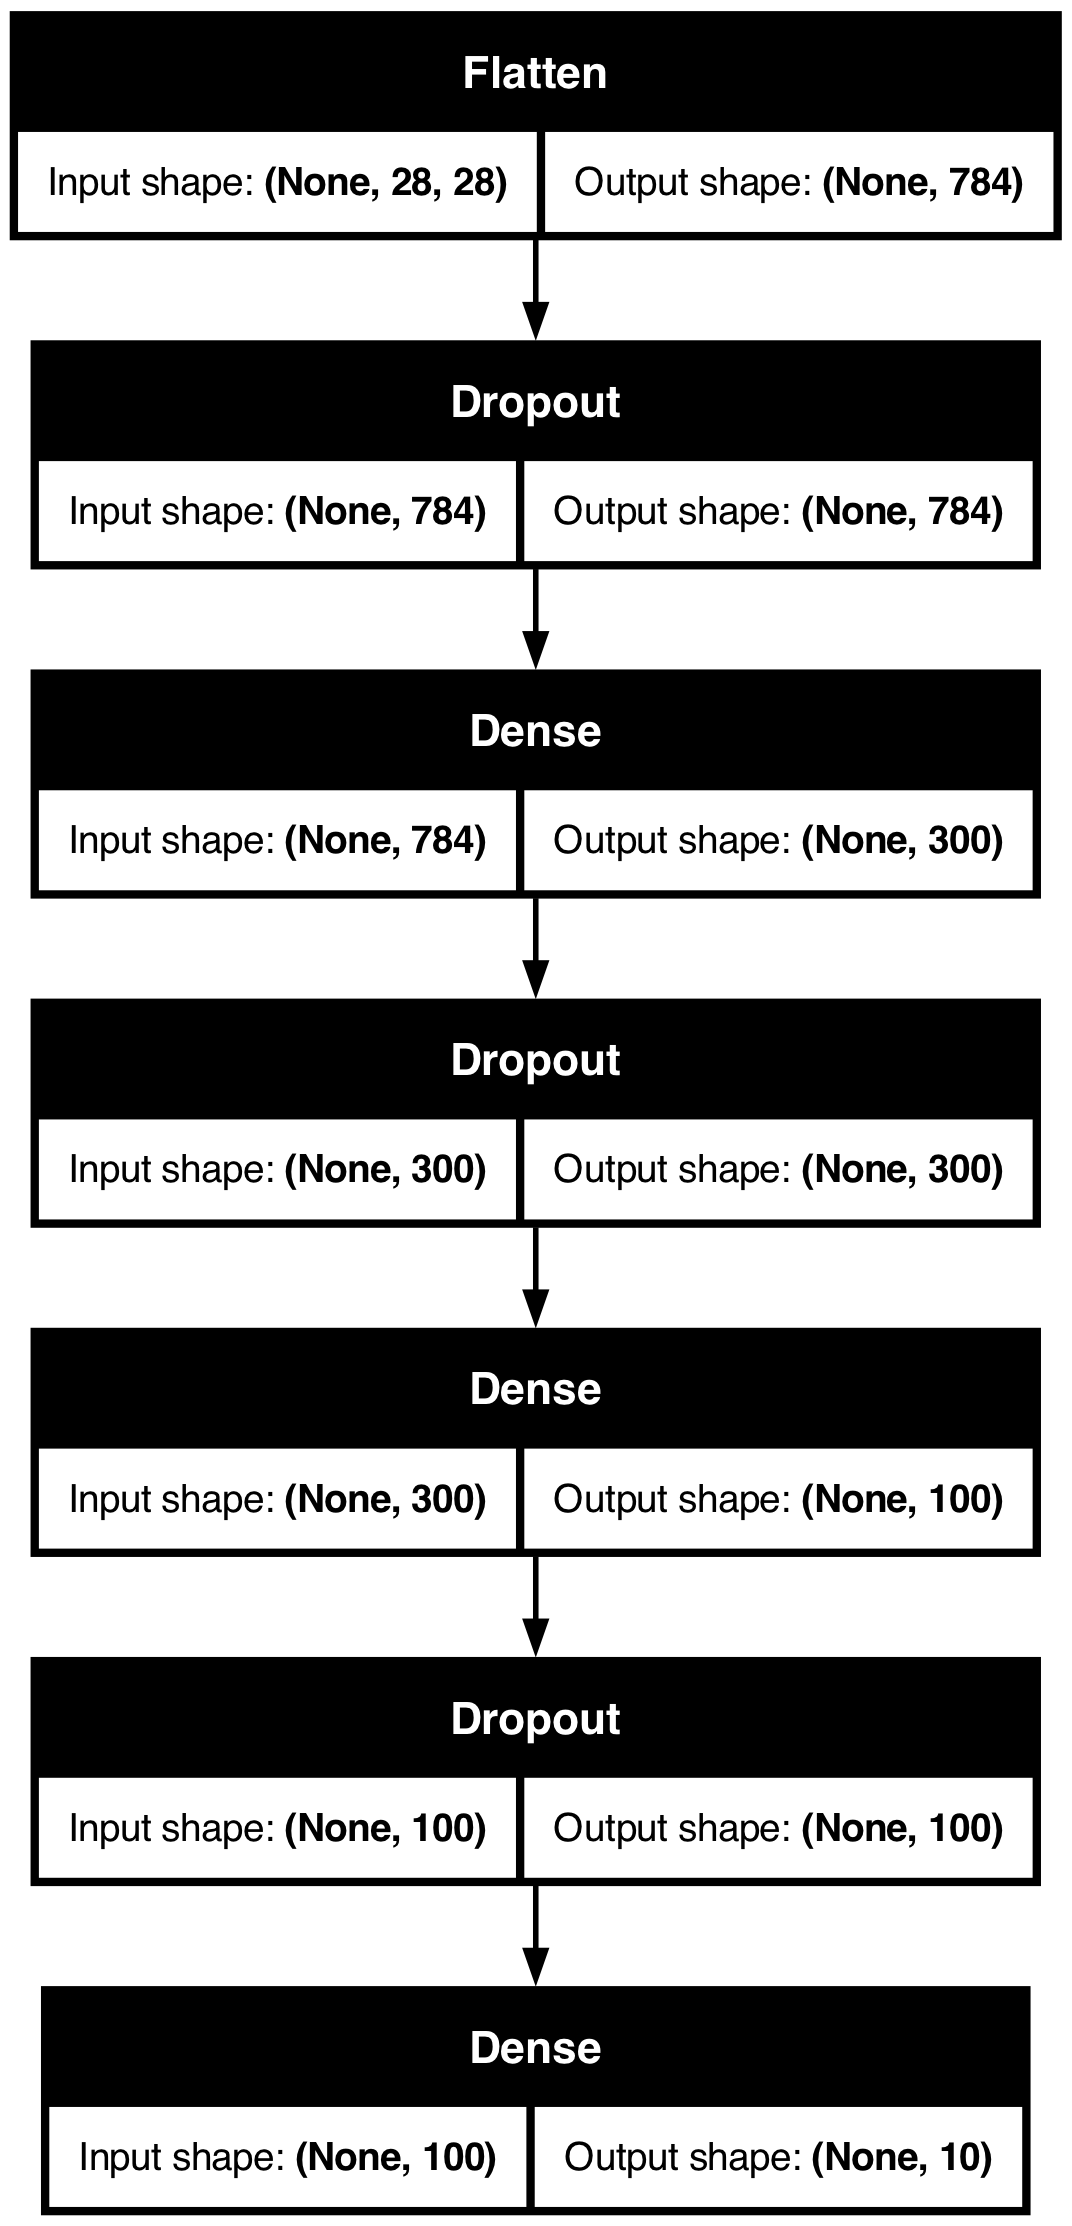

In [33]:
model4.summary()
keras.utils.plot_model(model4, "erins_fashion_mnist_model4.png", show_shapes=True)

In [34]:
# Describe the shape of the sequential NN with change to optimizer, now using Adam
model4.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [35]:
# Fit the model with the new optimizer
# Train the model for 50 epochs and include EarlyStopping to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history4 = model4.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping])

Epoch 1/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7303 - loss: 0.7473 - val_accuracy: 0.8544 - val_loss: 0.3947
Epoch 2/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8328 - loss: 0.4553 - val_accuracy: 0.8696 - val_loss: 0.3596
Epoch 3/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8460 - loss: 0.4162 - val_accuracy: 0.8728 - val_loss: 0.3447
Epoch 4/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8511 - loss: 0.4023 - val_accuracy: 0.8780 - val_loss: 0.3317
Epoch 5/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8612 - loss: 0.3726 - val_accuracy: 0.8722 - val_loss: 0.3469
Epoch 6/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8636 - loss: 0.3689 - val_accuracy: 0.8826 - val_loss: 0.3225
Epoch 7/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8664 - loss: 0.3558 - val_accuracy: 0.8756 - val_loss: 0.3282
Epoch 8/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8700 - loss: 0.3494 - 

In [36]:
# Get final validation loss and accuracy
val_loss = history4.history["val_loss"][-1]
val_accuracy = history4.history["val_accuracy"][-1]

# Log the results
log_model_validation(model_name4, val_loss, val_accuracy)

✅ Logged: D3_ReLU_Adam_LR0.001_XG_DR0.2_EP50 — Val Acc: 0.8938, Val Loss: 0.2940


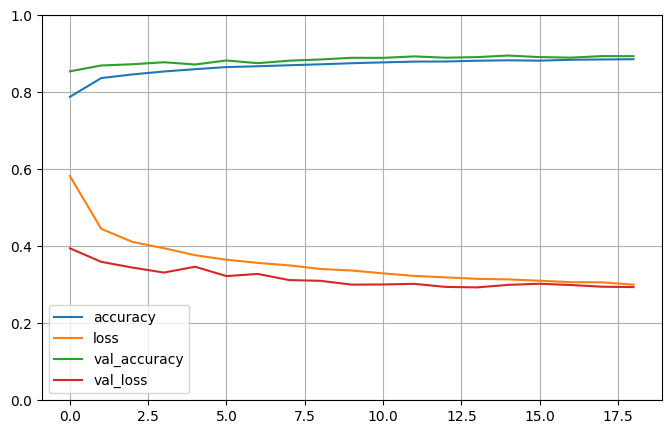

In [37]:
pd.DataFrame(history4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.savefig("keras_learning_curves_plot4")
plt.show()

## Change 5: Same Optimizer (SGD) + Add Regularization(Dropout Rate 0.2) 
- Same optimizer SGD 
- Kept the SGD optimizer with a learning rate of 0.001.
- Dropout rate of 0.2.
- Include EarlyStopping to prevent overfitting.

In [38]:
model_name5 = "D3_ReLU_SGD_LR0.001_XG_DR0.2"

# Describe the shape of the sequential NN with change to optimizer, now using SGD
model5 = keras.models.Sequential([
    # Made Input(shape) object as first layer to match Keras best practices
    keras.Input(shape=[28, 28]),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.2),  # Add dropout layer with 20% dropout rate
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dropout(0.2),  # Add dropout layer with 20% dropout rate
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.2),  # Add dropout layer with 20% dropout rate
    keras.layers.Dense(10, activation="softmax")
])

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

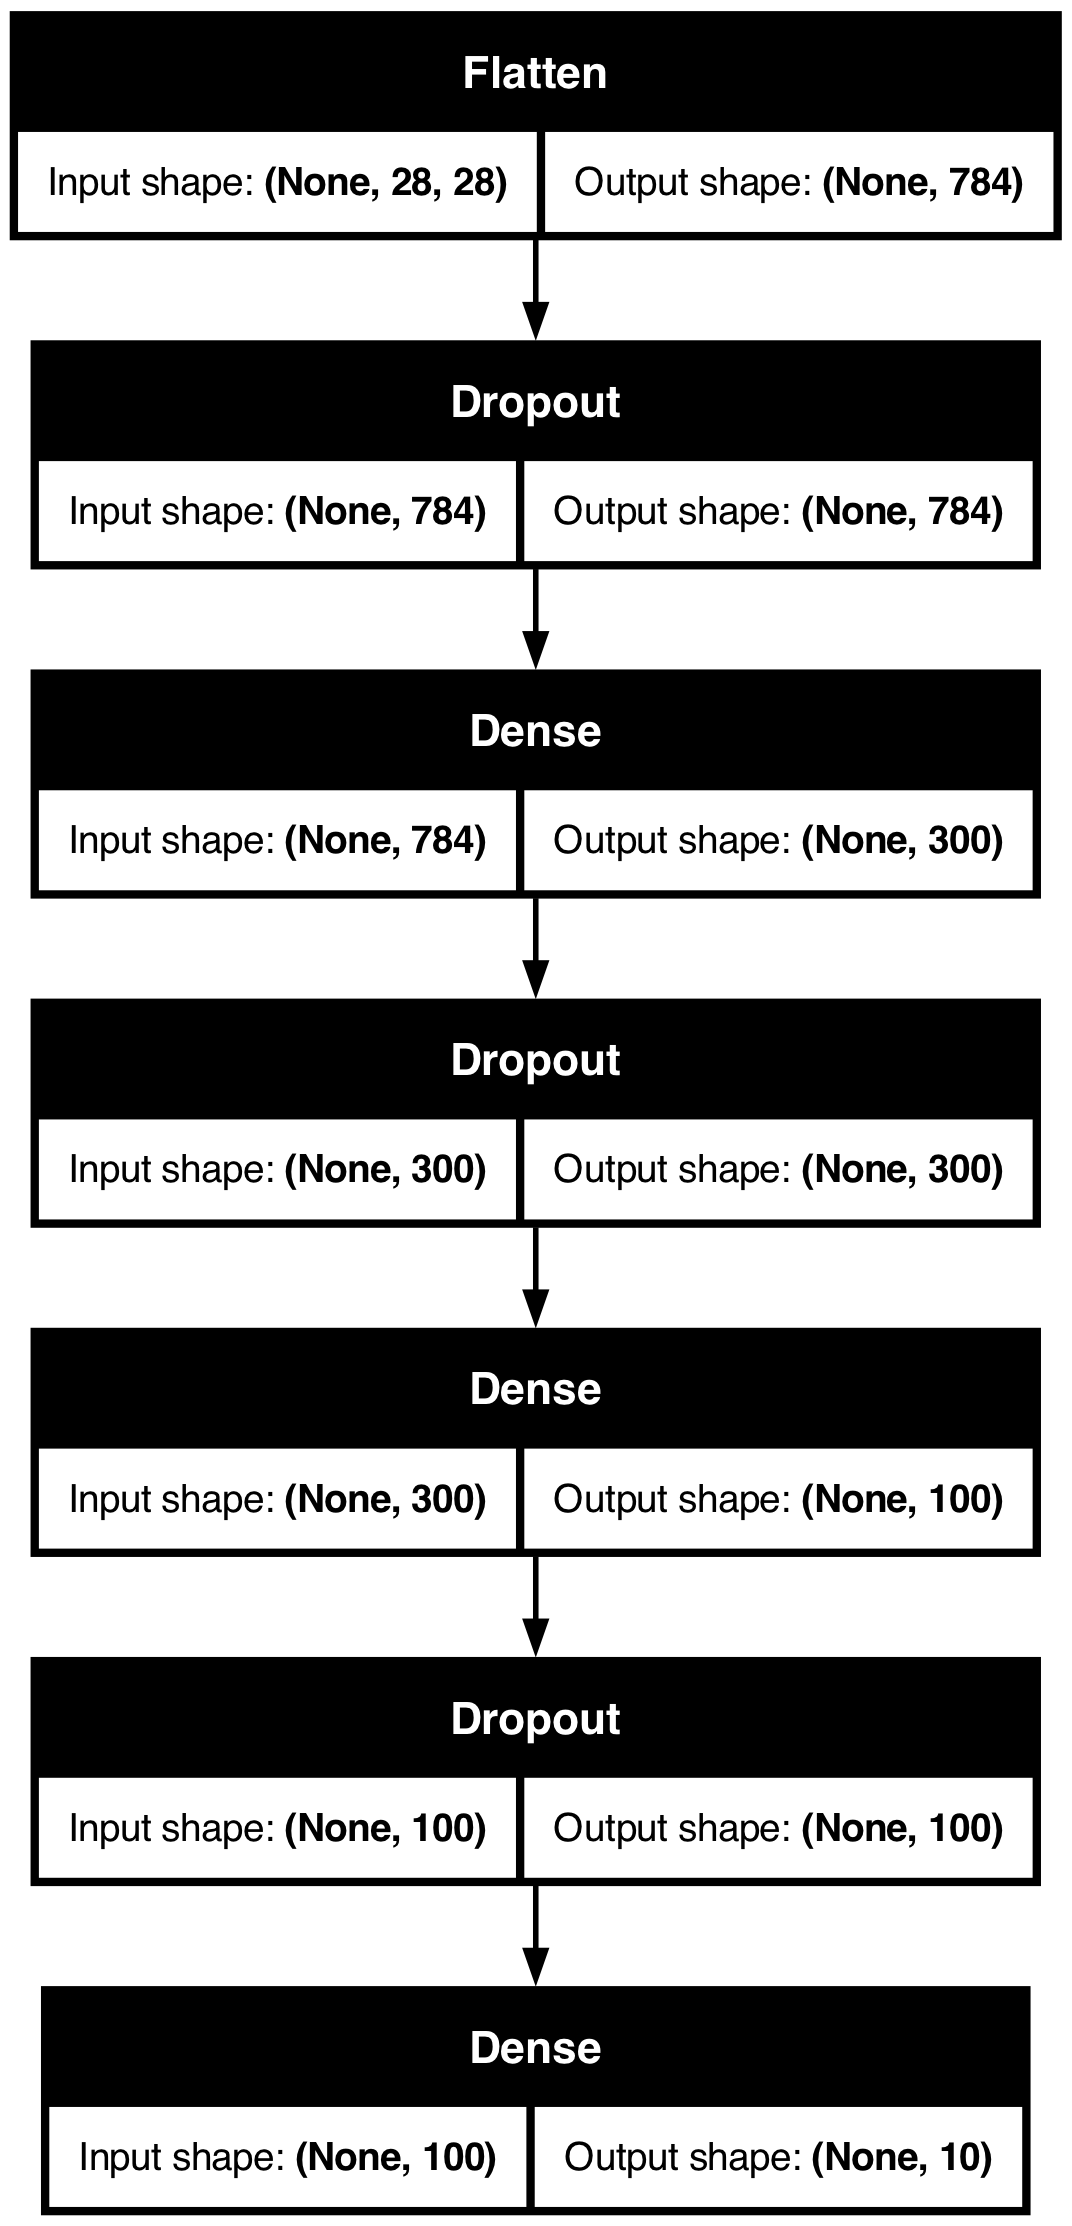

In [39]:
model5.summary()
keras.utils.plot_model(model5, "erins_fashion_mnist_model5.png", show_shapes=True)

In [40]:
# Describe the shape of the sequential NN with change to optimizer, now using SGD
model5.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [41]:
# Fit the model with the new optimizer
history5 = model5.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5595 - loss: 1.2448 - val_accuracy: 0.7936 - val_loss: 0.5724
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7690 - loss: 0.6530 - val_accuracy: 0.8306 - val_loss: 0.4903
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7977 - loss: 0.5761 - val_accuracy: 0.8426 - val_loss: 0.4466
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8123 - loss: 0.5265 - val_accuracy: 0.8472 - val_loss: 0.4273
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8146 - loss: 0.5113 - val_accuracy: 0.8592 - val_loss: 0.4066
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8277 - loss: 0.4815 - val_accuracy: 0.8622 - val_loss: 0.3919
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8290 - loss: 0.4721 - val_accuracy: 0.8644 - val_loss: 0.3832
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8334 - loss: 0.4645 - 

In [42]:
# Get final validation loss and accuracy
val_loss = history5.history["val_loss"][-1]
val_accuracy = history5 .history["val_accuracy"][-1]

# Log the results
log_model_validation(model_name5, val_loss, val_accuracy)

✅ Logged: D3_ReLU_SGD_LR0.001_XG_DR0.2 — Val Acc: 0.8890, Val Loss: 0.3069


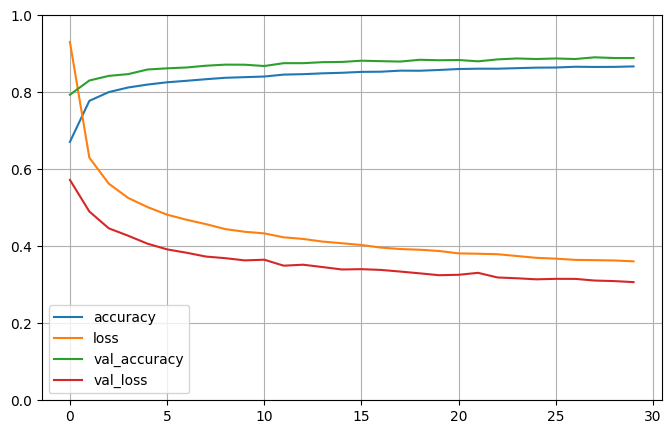

In [43]:
pd.DataFrame(history5.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.savefig("keras_learning_curves_plot5")
plt.show()

## CONCLUSION 

In this notebook, I have made several changes to the model architecture, optimizer, and regularization techniques to improve the model's performance on the Fashion MNIST dataset. 

The model chosen for the final evaluation with the test set was model, D3_ReLU_Adam_LR0.001_XG_DR0.2, which had the highest validation accuracy of 90.02% and a moderate validation loss of 0.2947. 

By examining the plot of the training and validation accuracy for the second model, D3_ReLU_Adam_LR0.001_XG (with the second highest validation accuracy, 89.54%), seems to be overfitting to the training data. So the Model from change 3 was chosen for it balance between validation accuracy and loss.




In [44]:
log_df = pd.read_csv("model_validation_log.csv")
log_df.sort_values(by="Val_Accuracy", ascending=False)


,Model_Name,Timestamp,Val_Loss,Val_Accuracy
3,D3_ReLU_Adam_LR0.001_XG_DR0.2,2025-07-19 11:05:13,0.2947,0.9002
2,D3_ReLU_Adam_LR0.001_XG,2025-07-19 11:03:29,0.4092,0.8954
1,D4_ReLU_SGD_LR0.01_XG,2025-07-19 11:00:23,0.2908,0.8938
4,D3_ReLU_Adam_LR0.001_XG_DR0.2_EP50,2025-07-19 11:06:14,0.2940,0.8938
0,D3_ReLU_SGD_LR0.01_XG,2025-07-19 10:59:22,0.3109,0.8918
5,D3_ReLU_SGD_LR0.001_XG_DR0.2,2025-07-19 11:07:18,0.3069,0.8890


From Left to right: Original Model (keras_learning_curves_plot.png), D3_ReLU_Adam_LR0.001_XG (keras_learning_curves_plot2.png), D3_ReLU_Adam_LR0.001_XG_DR0.2 (keras_learning_curves_plot3.png)

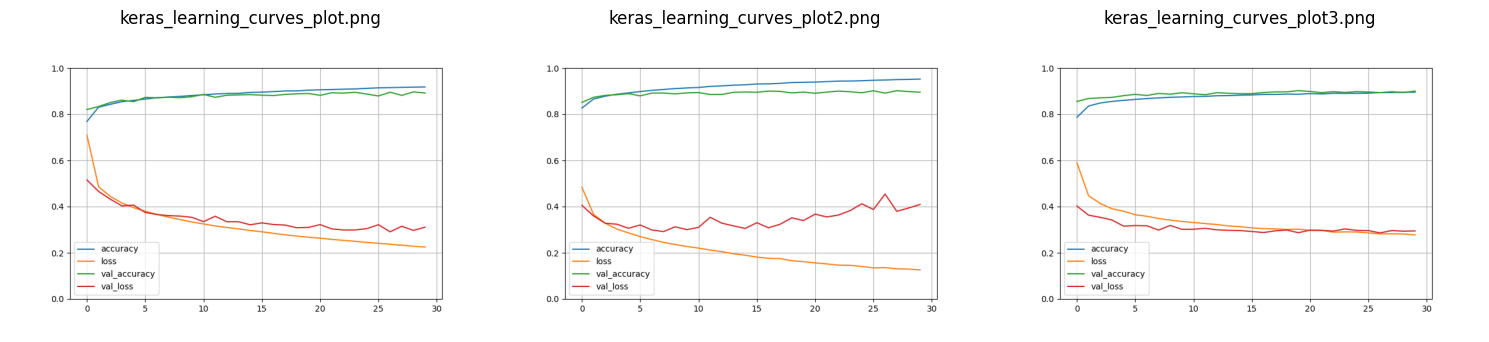

In [45]:
import matplotlib.image as mpimg

# List of saved plot image filenames
image_files = [
    "keras_learning_curves_plot.png",
    "keras_learning_curves_plot2.png",
    "keras_learning_curves_plot3.png"
]

# Number of images
n = len(image_files)

# Display side by side
fig, axes = plt.subplots(1, n, figsize=(5 * n, 4))

# If only one image, make axes a list
if n == 1:
    axes = [axes]

for ax, image_file in zip(axes, image_files):
    img = mpimg.imread(image_file)
    ax.imshow(img)
    ax.axis('off')  # Hide axes
    ax.set_title(image_file)

plt.tight_layout()
plt.show()


Step 8: Evaluate the trained model on testing data(Delayed this step until after making chnages and recording the model with the highest accuracy)

As seen in the evaluation results, Model3 outperforms the other models in terms of validation accuracy and loss. The optimizer used in Model3 is Adam with regularization (dropout rate of 0.2) and a learning rate of 0.001. The model has a validation accuracy of 90.02% and a validation loss of 0.2947, indicating that it generalizes well to unseen data.

In [46]:
model3.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8866 - loss: 0.3241


[0.326123982667923, 0.8873999714851379]

In [47]:
model2.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - accuracy: 0.8919 - loss: 0.4563


[0.45982494950294495, 0.8913000226020813]

In [48]:
model0.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.8847 - loss: 0.3351


[0.3411239683628082, 0.8799999952316284]